<h3><center>Applied Data Mining</center></h3>
<h1><center>Lab : Clustering</center></h1>
<h4>Aung Naing Oo</h4><hr/>
In this lab, we use data sets of Iris_01 and sample-iris. Both data sets are the data describing 3 different species of iris flowers. It consists of four features describing the length and width of the sepals and petals of the flowers.

### Task A - 1

In this task, you will 
- perform `k-means` clustering on the data
- visualise the data and the clusters

You have to create a classifier, fit the data, and predict the classes. The following skills will be required.

- Using pandas, loading the data in a dataframe, and creating a numpy array from the dataframe.
- Using the `sklearn k-means` clustering function.
- Converting the data to a 2D representation using PCA, and creating a scatter plot using `matplotlib`.

Perform the following tasks:
1. Load the dataset `Iris_01` in a dataframe
1. Put the feature values in a numpy array
1. Draw a boxplot of the dataset
1. From `sklearn.cluster`, import `KMeans`, and from `sklearn.metrics`, import `silhouette_samples` and `silhouette_score`.
1. Make a 2D plot of the clusters and the cluster centres. To reduce the 4D data (the four features) to 2D, use the `PCA` function which can be imported from `sklearn.decomposition`. 
1. Repeat the above with two and four clusters.

In [40]:
# We need the data set
import pandas as pd
data = pd.read_csv('lab2_data/Iris_01.csv')
data.head(10)

,species,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
5,setosa,5.4,3.9,1.7,0.4
6,setosa,4.6,3.4,1.4,0.3
7,setosa,5.0,3.4,1.5,0.2
8,setosa,4.4,2.9,1.4,0.2
9,setosa,4.9,3.1,1.5,0.1


<AxesSubplot:>

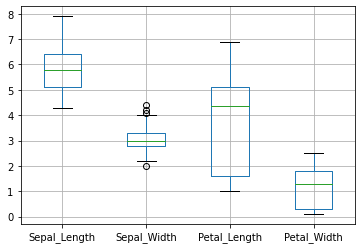

In [12]:
# Create the numpy arrays with values and make a box plot of the data
numpy_array = data.to_numpy()


#Box plot can be done by using data frames straightaway. 
data.boxplot()

In [116]:
# importing packages for KMeans and silhouette (samples, and score)
# Use data, X for example
# set the number of clusters
# fit to X
# do prediction
# get labels
# get cluster centers
# get inertia
# find the silhouetter average by using the X and labels

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances


X = data.drop(columns=['species'])
y = data.drop(columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'])

km = KMeans(n_clusters=3, random_state=42)
km.fit_predict(X)
labels = km.labels_
cluster_centers = km.cluster_centers_
inertias = km.inertia_
score = metrics.silhouette_score(X, labels, metric='euclidean')


In [109]:
print ("Silhouetee score: ")
print(score)
print("\n")
print ("Inertia score: ")
print(inertias)

Silhouetee score: 
0.5528190123564102


Inertia score: 
78.85144142614601


In [56]:
# 4 dimensions of data
# reduce it to 2 using Principal Component Analysis (PCA) 
# import PCA from sklearn
# do a pca analysis (PCA(n_components=2).fit(data))
# do a pca transform
# do a pca transform on the cluster centers you found previously (cluster centers in 2d)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_fitted_X = pca.fit_transform(X)
pca_transformed_centers = pca.fit_transform(cluster_centers)

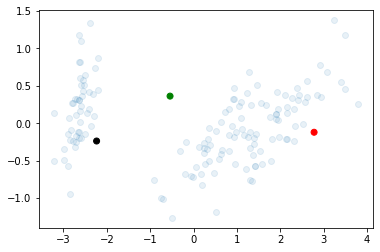

In [106]:
# plotting
# plot the 1st component against the 2nd one
# plot the cluster centers
# Create figure

#1st and 2nd components
plt.scatter(pca_fitted_X[:, 0], pca_fitted[:, 1],alpha=0.1)

#cluster centers with green, red and black in colors
plt.scatter(pca_transformed_centers[:, 0], pca_transformed_centers[:, 1],c=['g','r','k'], alpha=1)

__Questions__: Answer the following questions for the report:
1. What does the inertia signify?
1. What does the silhouette score signify?
1. We know there are three classes, and that three clusters would be optimal. What does the inertia and silhouette scores suggest as the right number of clusters?

"""TODO:
Answer the above questions here.
"""
1. Inertia is the sum of squared distances of samples to their closest cluster center. In other words, the smaller the figure, the closer the sample is to the cluster center. 

2. Silhouette score measures how similar a sample is to its own cluster relative to other clusters. A high score indicates a strong cohesian of the sample with its cluster. Values range from [-1 to 1]

3. Silhouette score is 0.55 which is rather poor. A high score would be generally closer to 1. The ideal number of clusters to be set can be found by performing a Silhouette analysis. 
To improve the inertia score (i.e <78.85), a higher cluster number can be chosen. Perfect inertia score of 0 can be achieved by setting k to the sample size, but it would defeat the purpose of clustering. Hence, Elbow Method can be used to find a better k size.
But from the pca plot above, ideally k=2 would be enough to cluster the samples.


### Task A - 2

For the following dataset:

Text(0, 0.5, 'Feature 2')

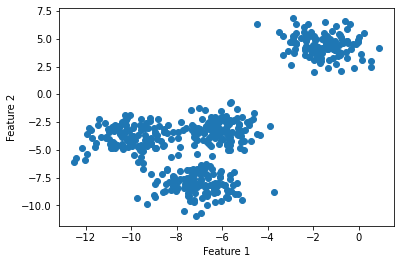

In [142]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt

X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility
plt.figure(1)
plt.rcParams.update({'font.size': 10})
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

for k values of 2,3,4,5,6, and 7
- Find Silhouette Scores
- plot k values against the Silhouette Scores

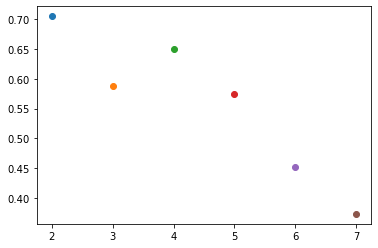

In [147]:
k=[2,3,4,5,6,7]
SC=[]
for j in range(len(k)):    
    km = KMeans(n_clusters=k[j], random_state=42)
    km.fit_predict(X)
    sc = silhouette_score(X, km.labels_, metric='euclidean')
    SC.append(sc)
    plt.scatter(k[j],SC[j])

- Set K to 4
- Find kemeans
- Find the values of Silhoutte Scores
- Find the scatter plot of the data (1st column against the 2nd column)
- Find the scatter plot of the cluster centers
  

[[ -2.13336832   5.18504632]
 [ -9.04321812  -3.90513228]
 [ -7.76203194  -7.5890664 ]
 [ -1.10727786   3.88318811]
 [ -6.0155412   -3.1515097 ]
 [ -6.35009809  -8.6405868 ]
 [-10.71316116  -3.73593211]]


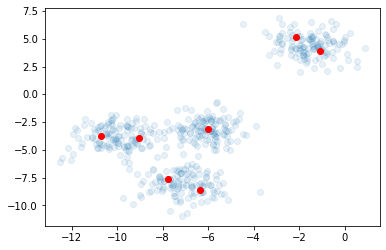

In [153]:
# plotting the k-means centroids
k=4
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
sc= silhouette_score(X, kmeans.labels_, metric='euclidean')
plt.scatter(X[:,0],X[:,1],alpha=0.1)
cluster_centers = km.cluster_centers_
print(cluster_centers)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],c=['r'],alpha=1)



### Task B
For this task, we are going to use the dataset 'sample-iris'. Carry out the following analyses.
1. Draw hierarchical clusters based on first and second columns? 
1. How many instances does the data have based on dendrogram?
1. Draw hierarchical clusters based on all columns? How does the dendrogram change?

1. What is the best number of clusters for the data points represented by dendrogram? (__Hint__: The horizontal line that crossess the vertical lines of cluters distance / dissimilarity.)
1. Run DBSCAN clustering on iris dataset.
1. Change the different parameters and rerun the code.
1. How does the result change based on different parameters?

In [3]:
"""TODO:
Answer the above questions here.
"""
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

#Ref: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

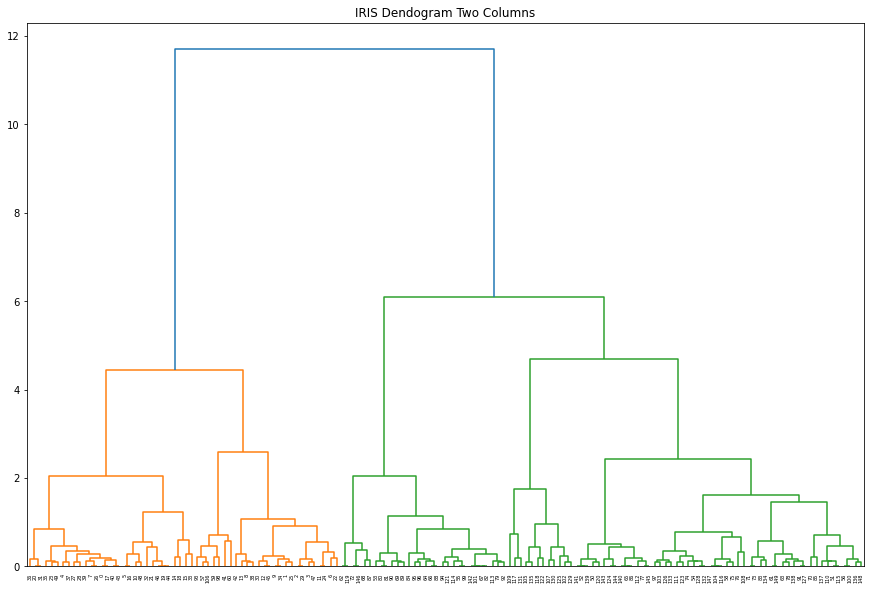

In [208]:
iris = load_iris()

X = iris.data
two_columns = X[:,[0,1]] #first two columns
plt.figure(figsize=(15, 10))
plt.title("IRIS Dendogram Two Columns")
dend = shc.dendrogram(shc.linkage(two_columns, method='ward'))


In [211]:

"""
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None) #also known as Bottom up 

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=100)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
"""
#dir(dend)

#Number of instances 


'\n# setting distance_threshold=0 ensures we compute the full tree.\nmodel = AgglomerativeClustering(distance_threshold=0, n_clusters=None) #also known as Bottom up \n\nmodel = model.fit(X)\nplt.title("Hierarchical Clustering Dendrogram")\n# plot the top three levels of the dendrogram\nplot_dendrogram(model, truncate_mode="level", p=100)\nplt.xlabel("Number of points in node (or index of point if no parenthesis).")\nplt.show()\n'

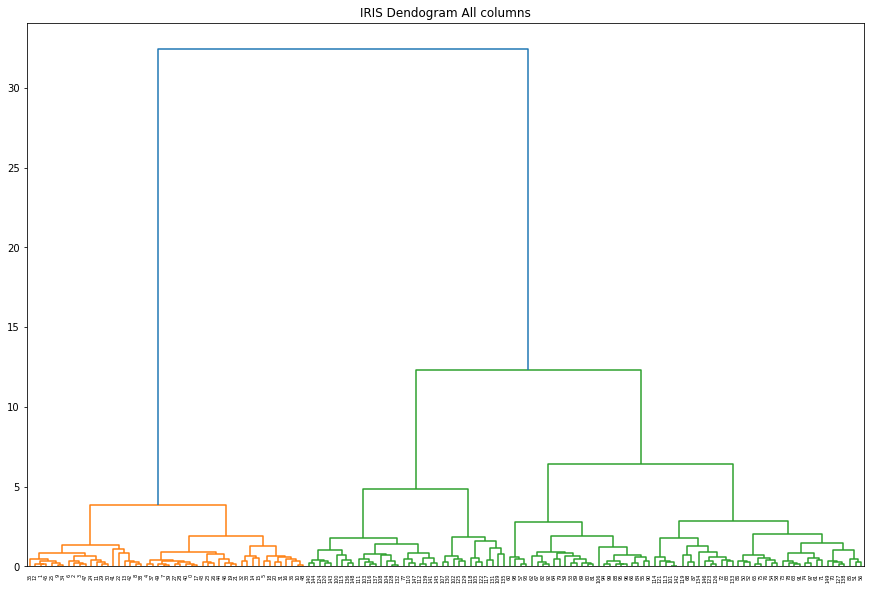

In [209]:
plt.figure(figsize=(15, 10))
plt.title("IRIS Dendogram All columns")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

3. The y labels which represents closeness of clusters have increased in scale 

4. The best number of clusters would be the horizontal line that passes through longest distance without another horizontal line. From the figure, a line can be drawn y=7. Then we end up with 4 clusters. 

In [19]:
#importing libraries
from sklearn.cluster import DBSCAN
iris = load_iris()

X = iris.data
#creates an instance of DBSCAN with default values for eps and min_samples.
dbscan=DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

Y_preds = dbscan.fit(X)
print(Y_preds.labels_)

print("This will create two cluster of 0s and 1s labels. -1s are noise")

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
This will create two cluster of 0s and 1s labels. -1s are noise


In [33]:
X = iris.data

#decrease the maximum distance between pair of samples. (i.e only short distance points will be grouped together)
#increase the number of samples to consider for clustering. Output should only be noise with 0 clusters.
dbscan=DBSCAN(algorithm='auto', eps=0.01, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=100, n_jobs=1, p=None)

Y_preds = dbscan.fit(X)
print(Y_preds.labels_)

print("This will create only noisy points")

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]
This will create only noisy points


In [21]:
X = iris.data

#increase the maximum distance between pair of samples. (i.e only short distance points will be grouped together)
#increase the number of samples to consider for clustering
dbscan=DBSCAN(algorithm='auto', eps=0.9, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=10, n_jobs=1, p=None)

Y_preds = dbscan.fit(X)
print(Y_preds.labels_)
print("This will create two clusters of labels 0s and 1s. -1s are noisy points")



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
This will create two clusters of labels 0s and 1s. -1s are noisy points


In [32]:
X = iris.data

#high eps, low min_samples
dbscan=DBSCAN(algorithm='auto', eps=20, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=1, n_jobs=1, p=None)

Y_preds = dbscan.fit(X)
print(Y_preds.labels_)
print("This will classify all instances under one label 0")


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
This will classify all instances under one label 0


In [41]:
X = iris.data

#low eps and low min_sample
dbscan=DBSCAN(algorithm='auto', eps=0.01, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=1, n_jobs=1, p=None)

Y_preds = dbscan.fit(X)
print(Y_preds.labels_)
print("This will classify all sample indices as their own cluster")
print(Y_preds.core_sample_indices_)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 101 142
 143 144 145 146 147 148]
This will classify all sample indices as their own cluster
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  8

In [30]:
X = iris.data

#high eps and high min_samples
dbscan=DBSCAN(algorithm='auto', eps=20, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=50, n_jobs=1, p=None)

Y_preds = dbscan.fit(X)
print(Y_preds.labels_)
print("This will classify all instances under one label 0")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
This will classify all instances under one label 0


7.

The two main parameters to adjust are the eps and min_samples. Domain knowledge is required to set appropriate values for these two parameters. 

high eps and low min_samples will cluster everything together under one which defeats the purpose of clustering. 

high eps and high min_samples will produce the same effect. 

low eps and low min_samples will produce as many clusters as the number of samples. 

low eps and high min_samples will only produce noise with 0 clusters formed.  

<div class="alert alert-block alert-danger">

__IMPORTANT__ 

Please complete this Jupyter Notebook and submit it to the Blackboard within __three weeks__ after this lab session. __Change the name of your notebook file__ to include `first and last names` of you and your group mates, e.g. "`NameSurname_NameSurname.ipynb`".

</div>